In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
df = pd.read_csv('./thyroid_cancer_risk_data.csv')
warnings.simplefilter('ignore')

In [3]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

Cleaning des Nan et duplicates

In [5]:
df.dropna(inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.drop(columns=['Patient_ID'], inplace=True)

Preview du dataset

In [8]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [9]:
df.describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


## Génération des graphiques

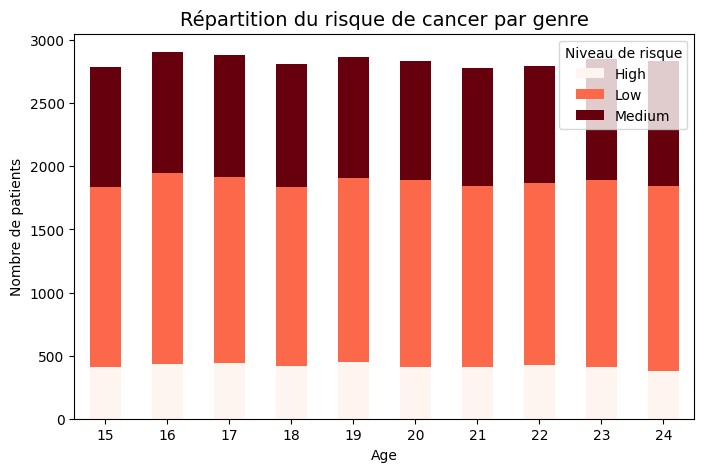

In [24]:
gender_risk_counts = df.groupby(["Age", "Thyroid_Cancer_Risk"]).size().unstack().head(10)

# Tracer un bar plot empilé
gender_risk_counts.plot(kind="bar", stacked=True, colormap="Reds", figsize=(8,5))

plt.title("Répartition du risque de cancer par genre", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Nombre de patients")
plt.legend(title="Niveau de risque")
plt.xticks(rotation=0)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_34776\2965908705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=['#1f77b4', '#ff7f0e'], ax=axes[0, 0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_34776\2965908705.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age_Group", palette="Reds", ax=axes[0, 1])


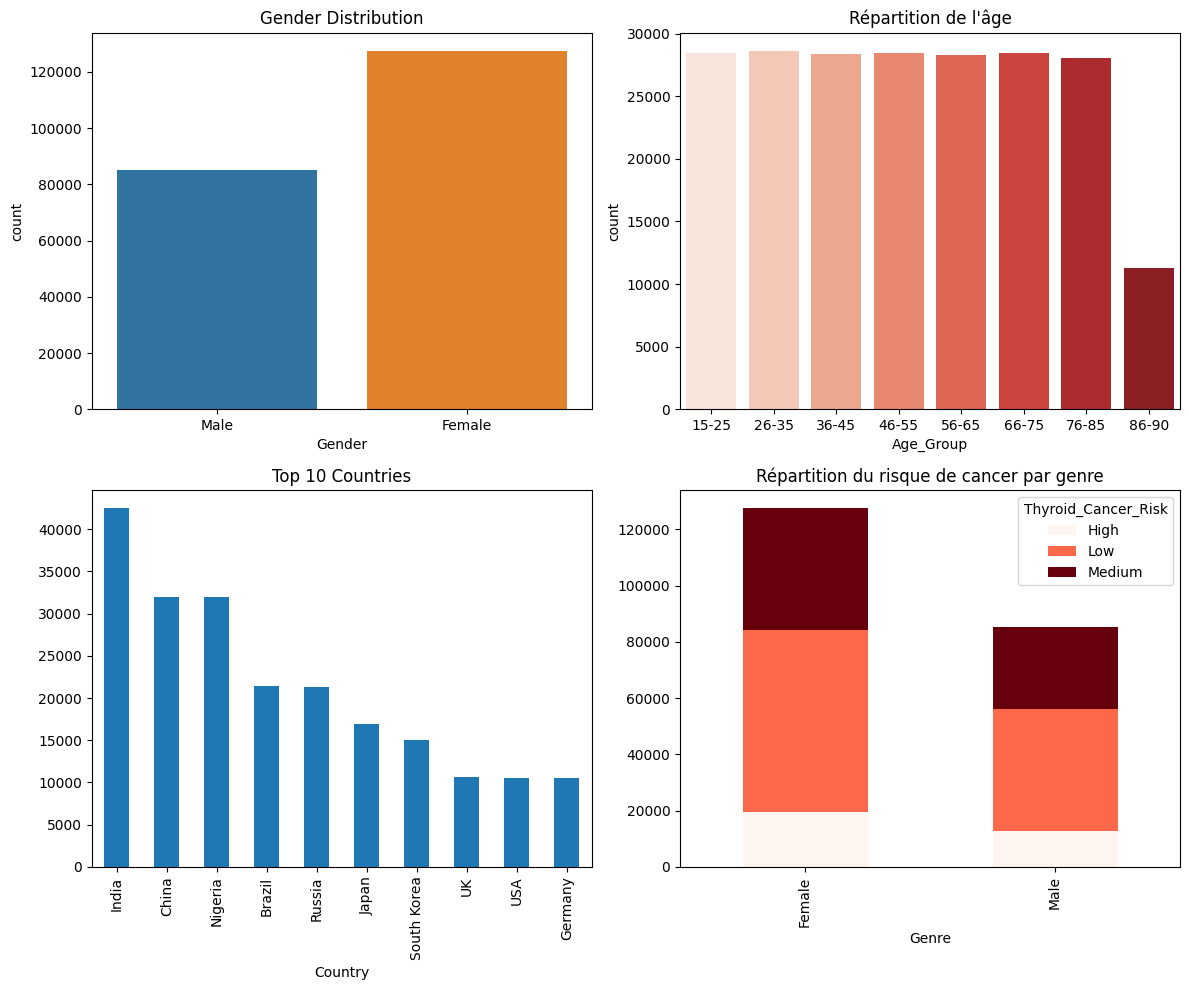

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data=df, x='Gender', palette=['#1f77b4', '#ff7f0e'], ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

age = [15, 25, 35, 45, 55, 65, 75, 85, 90]
groups = ["15-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85", "86-90"]
df["Age_Group"] = pd.cut(df["Age"], bins=age, labels=groups, right=True)

# Tracer un histogramme avec les groupes d'âge
sns.countplot(data=df, x="Age_Group", palette="Reds", ax=axes[0, 1])
axes[0, 1].set_title("Répartition de l'âge")

df['Country'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Countries')

gender_risk_counts = df.groupby(["Gender", "Thyroid_Cancer_Risk"]).size().unstack()
gender_risk_counts.plot(kind="bar", stacked=True, colormap="Reds", ax=axes[1, 1])
axes[1, 1].set_title("Répartition du risque de cancer par genre")
axes[1, 1].set_xlabel("Genre")



plt.tight_layout()
plt.show()

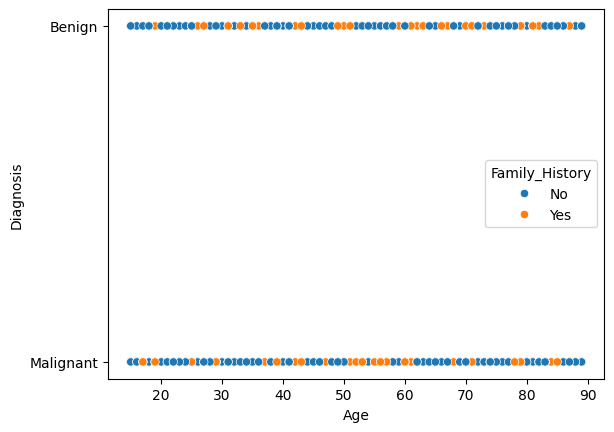

In [12]:
sns.scatterplot(data=df, x='Age', y='Diagnosis', hue='Family_History')
plt.show()

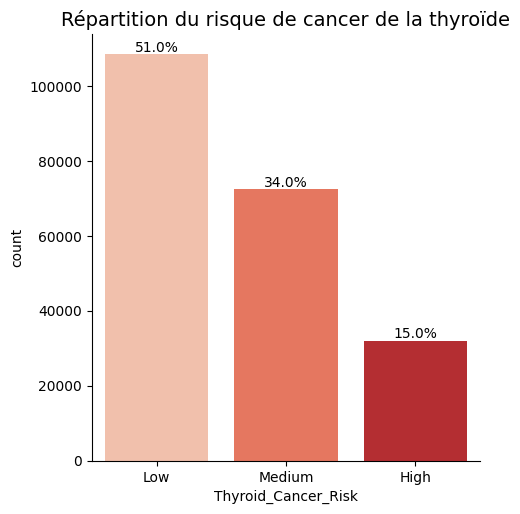

In [13]:
order = ['Low', 'Medium', 'High']
colors = sns.color_palette('Reds', len(order))

ax = sns.catplot(data=df, x='Thyroid_Cancer_Risk', kind='count', hue='Thyroid_Cancer_Risk', palette=dict(zip(order,colors)), order=order, legend=False)
ax.ax.set_title('Répartition du risque de cancer de la thyroïde', fontsize=14)
for p in ax.ax.patches:
    height = p.get_height()  
    total = len(df) 
    percentage = f'{100 * height / total:.1f}%'  
    ax.ax.text(p.get_x() + p.get_width() / 2, height, percentage, ha='center', va='bottom', fontsize=10, color='black')
plt.show()

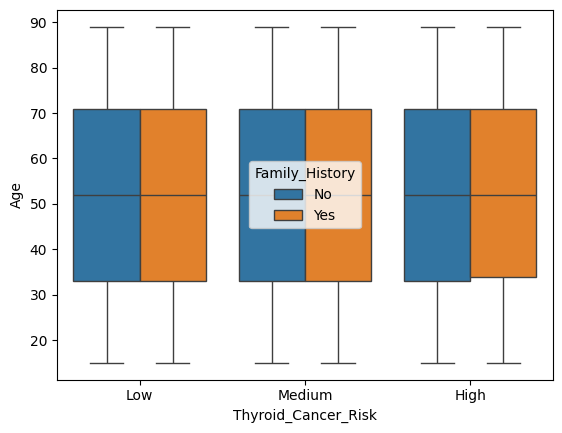

In [14]:
sns.boxplot(data=df, x='Thyroid_Cancer_Risk', y='Age', hue='Family_History')
plt.show()